<a href="https://colab.research.google.com/github/KrisDA-1/NU_Pandas/blob/main/W4_Encoding_Categorical_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
##Loading dataset
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('data.csv')
print(df.head())

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['class_encoded'] = le.fit_transform(df['class'])

print("Class labels mapping:", dict(zip(le.classes_, le.transform(le.classes_))))
print(df[['class', 'class_encoded']].head())

Class labels mapping: {'acc': np.int64(0), 'good': np.int64(1), 'unacc': np.int64(2), 'vgood': np.int64(3)}
   class  class_encoded
0  unacc              2
1  unacc              2
2  unacc              2
3  unacc              2
4  unacc              2


In [12]:
##One-hot encoding
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['buying', 'maint',
                    'doors', 'persons', 'lug_boot', 'safety']
ohe = OneHotEncoder(sparse_output=False)

ohe_array = ohe.fit_transform(df[categorical_cols])
print("OHE feature names:", ohe.get_feature_names_out(categorical_cols))

ohe_df = pd.DataFrame(
    ohe_array, columns=ohe.get_feature_names_out(categorical_cols))
df_ohe = pd.concat([df.reset_index(drop=True), ohe_df], axis=1)
print(df_ohe.head())

OHE feature names: ['buying_high' 'buying_low' 'buying_med' 'buying_vhigh' 'maint_high'
 'maint_low' 'maint_med' 'maint_vhigh' 'doors_2' 'doors_3' 'doors_4'
 'doors_5more' 'persons_2' 'persons_4' 'persons_more' 'lug_boot_big'
 'lug_boot_med' 'lug_boot_small' 'safety_high' 'safety_low' 'safety_med']
  buying  maint doors persons lug_boot safety  class  class_encoded  \
0  vhigh  vhigh     2       2    small    low  unacc              2   
1  vhigh  vhigh     2       2    small    med  unacc              2   
2  vhigh  vhigh     2       2    small   high  unacc              2   
3  vhigh  vhigh     2       2      med    low  unacc              2   
4  vhigh  vhigh     2       2      med    med  unacc              2   

   buying_high  buying_low  ...  doors_5more  persons_2  persons_4  \
0          0.0         0.0  ...          0.0        1.0        0.0   
1          0.0         0.0  ...          0.0        1.0        0.0   
2          0.0         0.0  ...          0.0        1.0        

In [14]:
##Putting data together with column transformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

ordinal_features = ['safety']
ordinal_categories = [['low', 'med', 'high']]

nominal_features = ['buying', 'maint', 'doors', 'persons', 'lug_boot']

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_features),
        ('nom', OneHotEncoder(sparse_output=False), nominal_features)
    ]
)

features = ordinal_features + nominal_features
X = df[features]
X_prepared = preprocessor.fit_transform(X)

print("Transformed shape:", X_prepared.shape)

Transformed shape: (1728, 19)


In [15]:
##Inspection and resulted dataset
import numpy as np

final_df = pd.DataFrame(
    np.hstack([X_prepared, df[['class_encoded']].values]),
    columns = list(preprocessor.get_feature_names_out()) + ['class_encoded']
)
print(final_df.head())

   ord__safety  nom__buying_high  nom__buying_low  nom__buying_med  \
0          0.0               0.0              0.0              0.0   
1          1.0               0.0              0.0              0.0   
2          2.0               0.0              0.0              0.0   
3          0.0               0.0              0.0              0.0   
4          1.0               0.0              0.0              0.0   

   nom__buying_vhigh  nom__maint_high  nom__maint_low  nom__maint_med  \
0                1.0              0.0             0.0             0.0   
1                1.0              0.0             0.0             0.0   
2                1.0              0.0             0.0             0.0   
3                1.0              0.0             0.0             0.0   
4                1.0              0.0             0.0             0.0   

   nom__maint_vhigh  nom__doors_2  nom__doors_3  nom__doors_4  \
0               1.0           1.0           0.0           0.0   
1         

##Difference between each encoding technique!

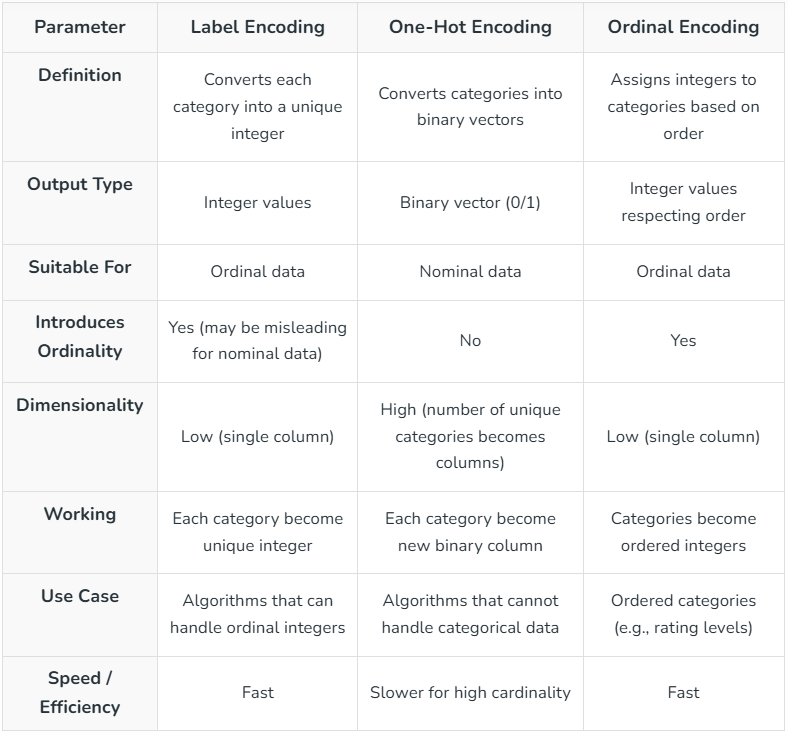